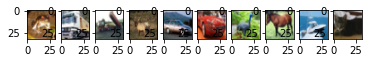

[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]


In [1]:

from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(train_images[i])
plt.show()
print(train_labels[:10])


In [2]:

from tensorflow.keras.utils import to_categorical

# normalize to 0~1, for convolution computation
train_data = train_images.astype('float32')/255.0
test_data = test_images.astype('float32')/255.0

train_labels2 = to_categorical(train_labels)
test_labels2 = to_categorical(test_labels)
print(test_labels2[:10])
print(test_labels[:10])


[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[3]
 [8]
 [8]
 [0]
 [6]
 [6]
 [1]
 [6]
 [3]
 [1]]


In [5]:


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation=('relu')))
model.add(Dropout(0.5))
model.add(Dense(10, activation=('softmax')))
print(model.summary())
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['acc'])


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)         

Epoch 1/20
134/134 [==============================] - 3s 23ms/step - loss: 1.9325 - acc: 0.2812 - val_loss: 1.5774 - val_acc: 0.4196
Epoch 2/20
134/134 [==============================] - 3s 22ms/step - loss: 1.4954 - acc: 0.4471 - val_loss: 1.3139 - val_acc: 0.5242
Epoch 3/20
134/134 [==============================] - 3s 22ms/step - loss: 1.2944 - acc: 0.5302 - val_loss: 1.1412 - val_acc: 0.5900
Epoch 4/20
134/134 [==============================] - 3s 22ms/step - loss: 1.1607 - acc: 0.5844 - val_loss: 1.0292 - val_acc: 0.6400
Epoch 5/20
134/134 [==============================] - 3s 22ms/step - loss: 1.0458 - acc: 0.6270 - val_loss: 0.9452 - val_acc: 0.6607
Epoch 6/20
134/134 [==============================] - 3s 22ms/step - loss: 0.9779 - acc: 0.6509 - val_loss: 0.8633 - val_acc: 0.6959
Epoch 7/20
134/134 [==============================] - 3s 22ms/step - loss: 0.9003 - acc: 0.6804 - val_loss: 0.8936 - val_acc: 0.6960
Epoch 8/20
134/134 [==============================] - 3s 22ms/step - 

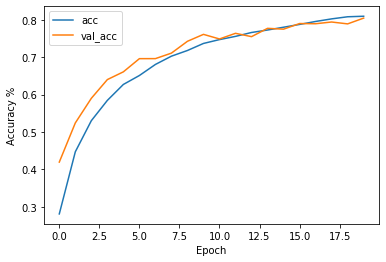

In [6]:

import matplotlib.pyplot as plt

train_history = model.fit(train_data, train_labels2, validation_split=0.2, epochs=20, batch_size=300)

plt.plot(train_history.history['acc'], label='acc')
plt.plot(train_history.history['val_acc'], label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy %')
plt.legend(loc='best')

plt.show()
